In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("HR_dataset.csv")

In [3]:
#We are going to build a model to predict whether employees will stay with the company or not
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#We can check our data set.

df.shape

(14999, 10)

In [5]:
#We do not have any missing value, our target feature is 'left', when employee left the company,it's value 
# become 1. If it is otherwise, it will become 0.
#all types of our coulmns also look right.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#checking our categorical variable to get how many value they have

df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [7]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
#we have imbalanced class in our target variable.
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [10]:
#mean and median values are close to each other for our numeric variables. 
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
#checking any dublicate rows in our data set.
df.duplicated().any()

True

In [12]:
#we need to drop them before building any model

df.drop_duplicates(keep=False,inplace=True)

In [13]:
df.duplicated().any()

False

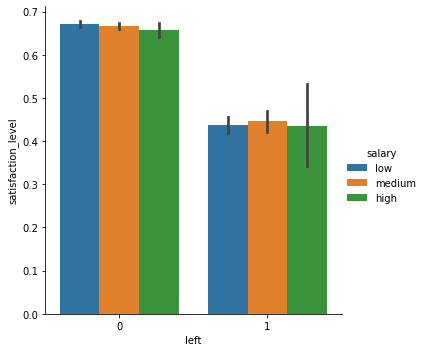

In [14]:
#we can check relationship between our numeric and target feature,
#we can see that employees who stays have higher satisfaction_level.

sns.catplot(data=df, x="left", y="satisfaction_level", hue="salary", kind='bar')

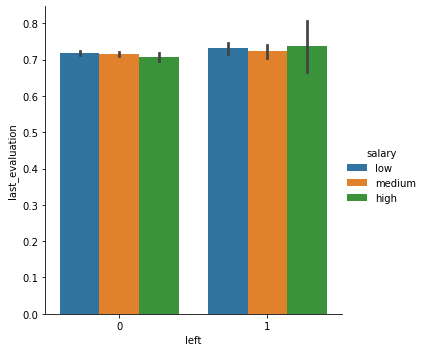

In [15]:
#their evaluation metric is close each other, it does not have an big impact on leaving the company
sns.catplot(data=df, x="left", y="last_evaluation",hue="salary", kind='bar')

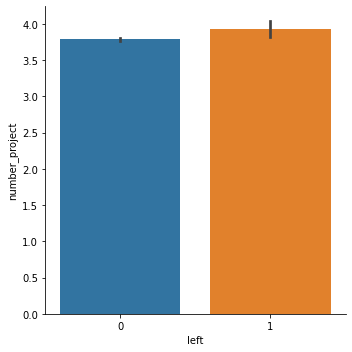

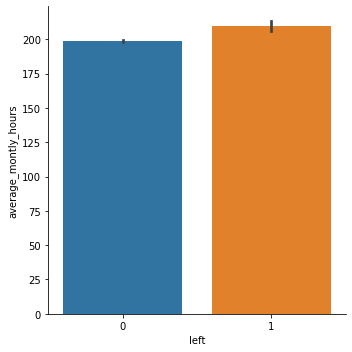

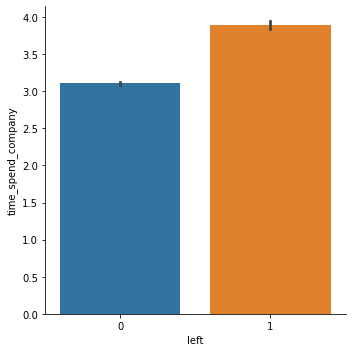

In [16]:
#employees who left the company have much more project, maybe they work long hours and spend much more
#time at the company to finish that projects and this situation creates lower satisfaction 
sns.catplot(data=df, x="left", y="number_project", kind='bar')
sns.catplot(data=df, x="left", y="average_montly_hours",kind='bar')
sns.catplot(data=df, x="left", y="time_spend_company", kind='bar')

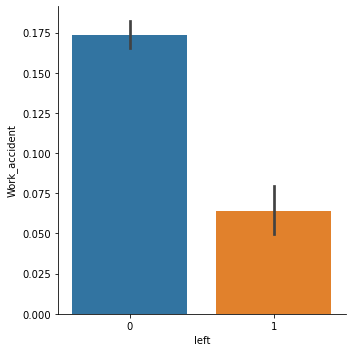

In [17]:
#There is no relationship with work_accident and 'left' feature.Employees who prefer stay at the company 
#have higher work_accident rate.
sns.catplot(data=df, x="left", y="Work_accident", kind='bar')

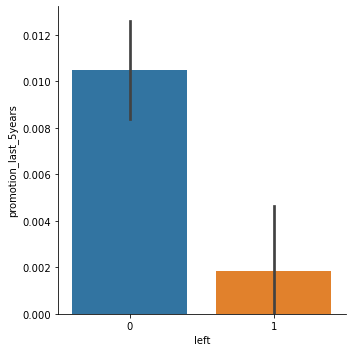

In [18]:
#employees who are not get promoted last 5 years prefer to leave the company
sns.catplot(data=df, x="left", y="promotion_last_5years", kind='bar')

In [19]:
CrosstabResult1=pd.crosstab(index=df['left'],columns=df['salary'])
print(CrosstabResult1)

salary  high   low  medium
left                      
0        729  3988    3855
1         28   606     447


<AxesSubplot:xlabel='left'>

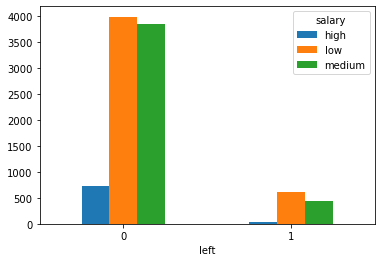

In [20]:
#employees who left the company earns less money than others who stay
CrosstabResult1.plot.bar(figsize=(6,4),rot=0)

In [21]:
CrosstabResult=pd.crosstab(index=df['left'],columns=df['Department'])
print(CrosstabResult)

Department   IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                          
0           682    552         461  452         229        467          448   
1            92     64          56   56          29         59           60   

Department  sales  support  technical  
left                                   
0            2252     1344       1685  
1             280      171        214  


<AxesSubplot:xlabel='left'>

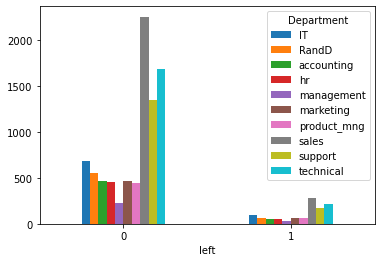

In [22]:
#Sales department have more churn rate than others.
CrosstabResult.plot.bar(figsize=(6,4),rot=0)

In [23]:
#we can create new features;

df["working_hours"]=df["number_project"]*df["time_spend_company"]


In [24]:
df["satisfaction_rate"]= pd.qcut(df["satisfaction_level"], 5, labels=[1, 2, 3, 4, 5])

In [25]:
#df=[df["time_spend_company"]*
    
df["working_hours_avg"]=df["number_project"]*df["average_montly_hours"]

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,working_hours,satisfaction_rate,working_hours_avg
783,0.36,0.46,2,132,3,0,1,0,sales,low,6,1,264
784,0.44,0.57,2,131,3,0,1,0,sales,low,6,1,262
785,0.85,0.99,5,248,5,0,1,0,sales,low,25,4,1240
786,0.78,0.93,5,225,5,0,1,0,sales,low,25,4,1125
787,0.39,0.46,2,156,3,0,1,0,sales,low,6,1,312


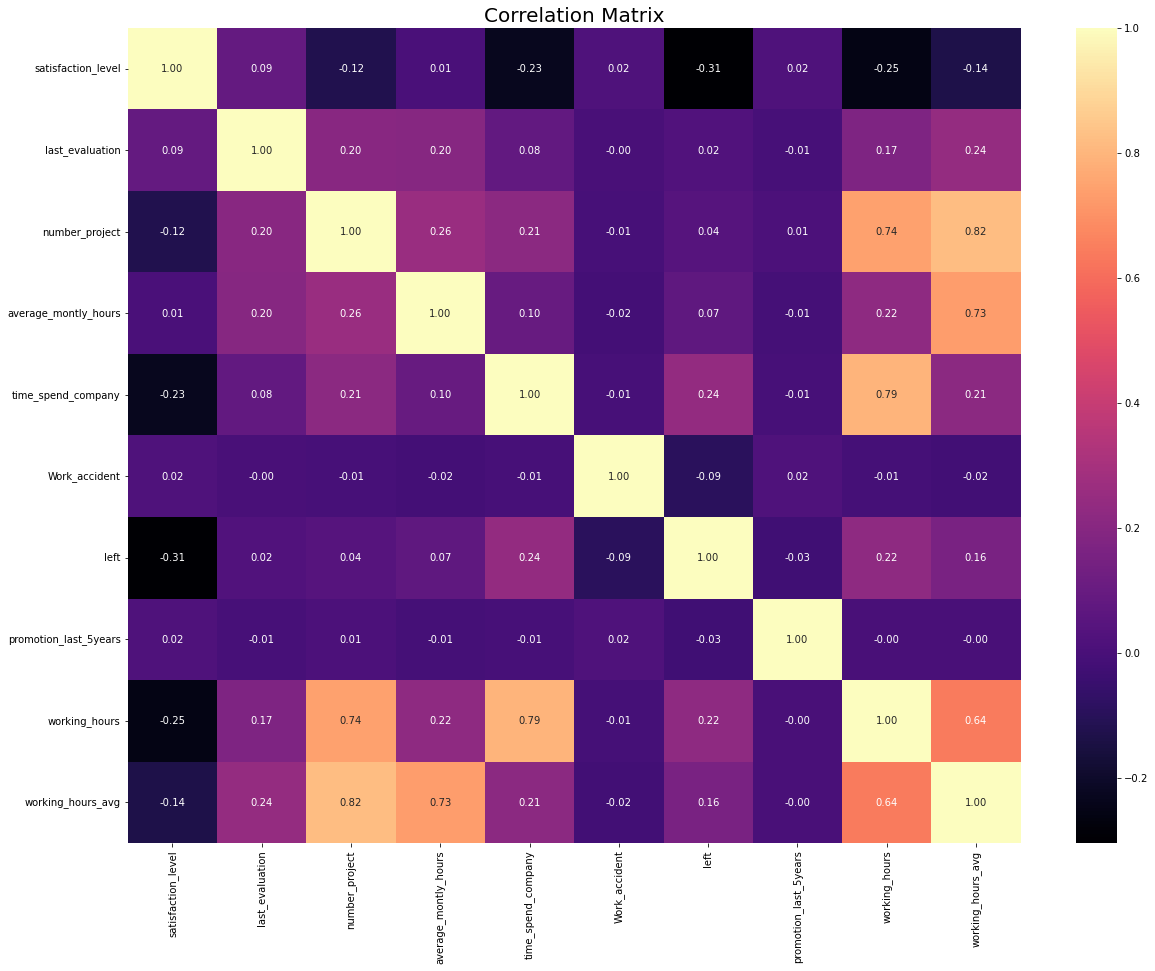

In [27]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [28]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,working_hours,working_hours_avg
satisfaction_level,1.000000,0.086887,0.123571,0.005276,0.232459,0.021016,0.305089,0.018970,0.254867,0.136309
last_evaluation,0.086887,1.000000,0.200795,0.198851,0.077771,0.002671,0.023149,0.006935,0.172738,0.241059
number_project,0.123571,0.200795,1.000000,0.256272,0.214711,0.006299,0.040572,0.010696,0.740041,0.820868
average_montly_hours,0.005276,0.198851,0.256272,1.000000,0.096334,0.018300,0.071124,0.013434,0.223355,0.734347
time_spend_company,0.232459,0.077771,0.214711,0.096334,1.000000,0.005490,0.235452,0.006813,0.791523,0.214223
Work_accident,0.021016,0.002671,0.006299,0.018300,0.005490,1.000000,0.094256,0.017795,0.012178,0.024465
left,0.305089,0.023149,0.040572,0.071124,0.235452,0.094256,1.000000,0.028073,0.221360,0.157106
promotion_last_5years,0.018970,0.006935,0.010696,0.013434,0.006813,0.017795,0.028073,1.000000,0.000532,0.001731
working_hours,0.254867,0.172738,0.740041,0.223355,0.791523,0.012178,0.221360,0.000532,1.000000,0.641752
working_hours_avg,0.136309,0.241059,0.820868,0.734347,0.214223,0.024465,0.157106,0.001731,0.641752,1.000000


In [29]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/var/folders/yh/h2zmmdf12tb96_kgv520kzzc0000gn/T/ipykernel_15277/2220268664.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [30]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [31]:
to_drop

['working_hours', 'working_hours_avg']

In [32]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

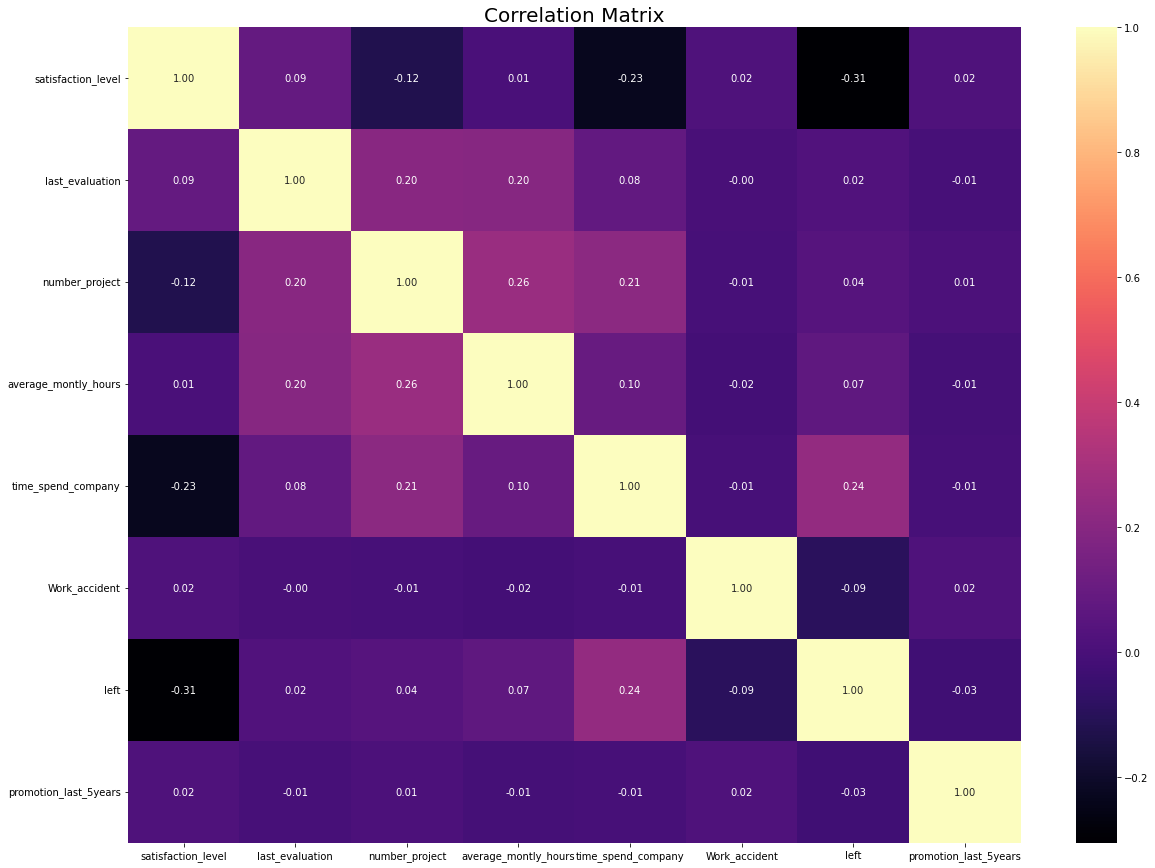

In [33]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [34]:
#converting categorical values into the numerical values
cat_cols= [col for col in df.columns if df[col].dtype not in [int, float]]
cat_cols

['Department', 'salary', 'satisfaction_rate']

In [35]:
df=pd.get_dummies(df, columns=["Department"], drop_first=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
labelencoder=LabelEncoder()

In [38]:
df["salary"]=labelencoder.fit_transform(df["salary"])

In [39]:
df["satisfaction_rate"]=labelencoder.fit_transform(df["satisfaction_rate"])

In [40]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_rate,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
783,0.36,0.46,2,132,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,1,3,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,1,3,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [41]:
#for our model, X and y

X=df.drop(["left"], axis=1)
y=df["left"]

In [42]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)

In [44]:
X_test=mms.transform(X_test)

In [45]:
lr=LogisticRegression()
log_model = lr.fit(X_train, y_train)

In [46]:
y_pred=log_model.predict(X_test)

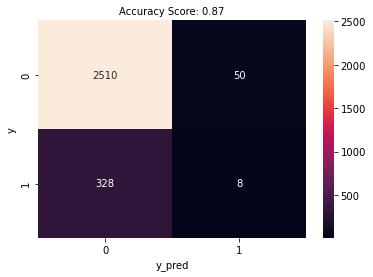

In [47]:
# CONFUSION MATRIX
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [48]:
accuracy_score(y_test,y_pred)

0.869475138121547

In [49]:
precision_score(y_test,y_pred)

0.13793103448275862

In [50]:
recall_score(y_test,y_pred)

0.023809523809523808

In [51]:
f1_score(y_test,y_pred)

0.04060913705583756

In [52]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV

In [53]:
#Farklı modeller üzerinden de kontrolleri yapabiliriz.

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 0.8]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}




In [54]:

classifiers = [("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


In [55]:
for name, classifier, params in classifiers:
    print(f"########## {name} ##########")
    cv_results = cross_validate(classifier, X, y, cv=3, scoring=["roc_auc"])
    print(f"AUC (Before): {round(cv_results['test_roc_auc'].mean(),4)}")
    gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
    final_model = classifier.set_params(**gs_best.best_params_)
    cv_results = cross_validate(final_model, X, y, cv=3, scoring=["roc_auc"])
    print(f"AUC (After): {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

########## RF ##########
AUC (Before): 0.9779


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

AUC (After): 0.981
RF best params: {'max_depth': 15, 'max_features': 7, 'min_samples_split': 8, 'n_estimators': 500}

########## XGBoost ##########
[22:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC (Before): 0.9811


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[22:17:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC (After): 0.9862
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
AUC (Before): 0.9824
AUC (After): 0.9821
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 500}

